# PROJET MACHINE LEARNING M2 EIF : L'IMPORTANCE DES MOTS

#### Importation de packages

In [1]:
import sys
sys.version
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import csv
import seaborn as sns

#### Récupérations des données

In [2]:
# Recupération des données
filename = "./cac40_v3.csv"
data = pd.read_csv(filename, quotechar='\"', doublequote=False,quoting=csv.QUOTE_NONE).drop(columns=['"'])
data=data.replace('\"','',regex=True)
data.columns = data.columns.str.replace('\"','')
data.head()

,TICKER,annee,mois,jour,OP,UP,DO,CL,VO,RDMT_J,...,strategique,transaction,actionnaires,coentreprise,construction,collaboration,developpement,l_acquisition,participation,recommandation
0,AC,2007,10,1,50.82,52.45,50.72,52.44,939518,0.045576,...,0,0,0,0,0,0,0,0,0,0
1,AC,2007,10,10,57.60,57.90,56.48,56.74,1167710,0.005640,...,0,0,0,0,0,0,0,0,0,0
2,AC,2007,10,11,56.57,57.90,56.57,57.06,910369,-0.005258,...,0,0,0,0,0,0,0,0,0,0
3,AC,2007,10,12,57.10,57.10,55.50,56.76,996349,-0.011628,...,0,0,0,0,0,0,0,0,0,0
4,AC,2007,10,15,56.76,57.29,55.77,56.10,573647,-0.003209,...,0,0,0,0,0,0,0,0,0,0


#### 1. Donner les caractéristiques de la base : 
    - nombre de lignes
    - nombre de colonnes
    - format/type des colonnes

In [3]:
#Affichage des caractéristiques
print("Nombre de lignes : {}\nNombre de colonnes : {}\n".format(len(data), len(data.columns)))
data['recommandation'] = pd.to_numeric(data['recommandation'])
print(data.dtypes)

Nombre de lignes : 106542
Nombre de colonnes : 280

TICKER             object
annee               int64
mois                int64
jour                int64
OP                float64
                   ...   
collaboration       int64
developpement       int64
l_acquisition       int64
participation       int64
recommandation      int64
Length: 280, dtype: object



*On liste les actions composant la base de données:*

In [4]:
list_tickers=data.TICKER.unique()

In [5]:
#Initialisation    
stats_df=pd.DataFrame(index=list_tickers)   
r_j=[]
r_s=[]
r_m=[]
max_overnight_increase=[]
max_overnight_decrease=[]
volatility_j=[]
volatility_s=[]
volatility_m=[]
big_chg_vol_j=[]
big_chg_vol_s=[]
big_chg_vol_m=[]

#compute rendement moyen, volatilité, et variations de volumes (quotidien,hebdo, mensuel, sur la période)
for t in list_tickers:
    actif = data[data.TICKER == t]
    actif = actif.sort_values(['annee', 'mois', 'jour'], ascending=[1, 1, 1])
    #rendement moyen annualisé
    r_j.append(actif.RDMT_J.values.mean()*252)
    r_s.append(actif.RDMT_S.values.mean()*52)
    r_m.append(actif.RDMT_M.values.mean()*12)
    #rendement overnight (non annualisé)
    change_ON=[x-1 for x in actif.OP.iloc[1:actif.shape[0]].values/actif.CL.iloc[0:actif.shape[0]-1].values]
    max_overnight_increase.append(max(change_ON))
    max_overnight_decrease.append(min(change_ON))
    #volatilité annualisée
    volatility_j.append(actif.RDMT_J.values.std()*252**0.5)
    volatility_s.append(actif.RDMT_S.values.std()*52**0.5)
    volatility_m.append(actif.RDMT_M.values.std()*12**0.5)
    #plus grande augmentation de volume
    big_chg_vol_j.append(actif.VOL_S.values.max())
    big_chg_vol_s.append(actif.VOL_S.values.max())
    big_chg_vol_m.append(actif.VOL_M.values.max())

#stockage des résulats dans un DataFrame
stats_df["RDM_MOYEN_J"]=r_j
stats_df["RDM_MOYEN_S"]=r_s
stats_df["RDM_MOYEN_M"]=r_m
stats_df["O/N_INCREASE"]=max_overnight_increase
stats_df["O/N_DECREASE"]=max_overnight_decrease
stats_df["VOLATILITY_J"]=volatility_j
stats_df["VOLATILITY_S"]=volatility_s
stats_df["VOLATILITY_M"]=volatility_m
stats_df['MAX_VOLUME_CHG_J']=big_chg_vol_j
stats_df['MAX_VOLUME_CHG_S']=big_chg_vol_s
stats_df['MAX_VOLUME_CHG_M']=big_chg_vol_m


#### 2. Présenter quelques statistiques de la base.

In [6]:
print(stats_df)

      RDM_MOYEN_J  RDM_MOYEN_S  RDM_MOYEN_M  O/N_INCREASE  O/N_DECREASE  \
AC       0.065276     0.060712     0.049476      0.152966     -0.131068   
ACA      0.045634     0.044091     0.027328      0.241228     -0.213218   
AI       0.093560     0.089048     0.084049      0.057408     -0.064352   
AIR      0.182388     0.187896     0.195091      0.123867     -0.103774   
ATO      0.163656     0.163123     0.153001      0.264223     -0.158879   
BN       0.042939     0.037708     0.034355      0.068366     -0.075611   
BNP      0.080507     0.074926     0.051713      0.159927     -0.192872   
CA      -0.053658    -0.059587    -0.076079      0.098820     -0.138523   
CAP      0.119784     0.116723     0.111198      0.076795     -0.149983   
CS       0.075240     0.071635     0.058217      0.176819     -0.162715   
DG       0.094743     0.086558     0.076221      0.098891     -0.093515   
EI       0.112628     0.112132     0.114410      0.155730     -0.078614   
EN       0.039837     0.0

3. Montrer que, quel que soit le ticker, la liste des mots apparaissant au moins sur 400 lignes et dont le rendement mensuel est en moyenne supérieur à 1% est la suivante : (cf. sujet)
Garder par la suite uniquement les lignes où au moins l'un des mots ci-dessus apparaît ; autrement dit que les variables explicatives portent pour modalité = 1.

In [7]:
#Récupération des mots qui apparaissent plus de 400 fois
all_words=data.columns[24:]
list_words=[]
for w in all_words:
    if data[w].sum()>=400:
        list_words.append(w)

print("=> Il y a {} mots qui sont apparus plus de 400 fois.".format(len(list_words)))
print("Voici ces mots :\n {} ".format(list_words))
#récupération des tickers qui ont un rendement mensuel supérieur à 1%
#tickers_rdt_sup_1=[]
#for t in list_tickers:
#    if stats_df.RDM_MOYEN_M[t]>=0.01*12:
#        tickers_rdt_sup_1.append(t)
#print("\n=> Il y a {} actions qui ont un rendement mensuel moyen supérieur à 1%.".format(len(tickers_rdt_sup_1)))
#print("Voici ces actions :\n {}" .format(tickers_rdt_sup_1))   

=> Il y a 32 mots qui sont apparus plus de 400 fois.
Voici ces mots :
 ['avec', 'd_un', 'dans', 'part', 'plus', 'pour', 'pres', 'sous', 'vers', 'vote', 'achat', 'apres', 'd_une', 'euros', 'group', 'passe', 'titre', 'action', 'groupe', 'hausse', 'nouvel', 'releve', 'actions', 'capital', 'contrat', 'general', 'nouveau', 'analyste', 'capital.', 'nouvelle', 'objectif', 'resultat'] 


In [8]:
result=[]
for w in list_words:
    apparitions=sum(data[w].values)
    rdmt_moy_m=sum(data[w].values*data['RDMT_M'].values)/apparitions
    if rdmt_moy_m >=0.01:
        result.append([w,apparitions,rdmt_moy_m])

print("Mot\tApparition\tRdt mensuel moyen")
print("==================================")
for i in range(len(result)):
    print("\n{}\t{}\t{}".format(result[i][0],result[i][1],result[i][2].round(4)))

Mot	Apparition	Rdt mensuel moyen

part	716	0.0119

plus	418	0.0101

pour	1966	0.0136

euros	446	0.0104

group	493	0.0129

passe	527	0.0138

titre	467	0.0122

groupe	467	0.0146

nouvel	494	0.0115

releve	413	0.0103

actions	607	0.0102

capital	761	0.012

contrat	540	0.0106

nouveau	511	0.0119

capital.	751	0.011

nouvelle	415	0.012

objectif	636	0.0147

resultat	458	0.0112


In [9]:
df = pd.DataFrame(result)
indic = data.filter(items=df[0]).sum(axis=1) > 0
indic

0         False
1         False
2         False
3         False
4         False
          ...  
106537     True
106538    False
106539    False
106540    False
106541    False
Length: 106542, dtype: bool

In [10]:
data['indic'] = indic
data

,TICKER,annee,mois,jour,OP,UP,DO,CL,VO,RDMT_J,...,transaction,actionnaires,coentreprise,construction,collaboration,developpement,l_acquisition,participation,recommandation,indic
0,AC,2007,10,1,50.820,52.450,50.720,52.440,939518,0.045576,...,0,0,0,0,0,0,0,0,0,False
1,AC,2007,10,10,57.600,57.900,56.480,56.740,1167710,0.005640,...,0,0,0,0,0,0,0,0,0,False
2,AC,2007,10,11,56.570,57.900,56.570,57.060,910369,-0.005258,...,0,0,0,0,0,0,0,0,0,False
3,AC,2007,10,12,57.100,57.100,55.500,56.760,996349,-0.011628,...,0,0,0,0,0,0,0,0,0,False
4,AC,2007,10,15,56.760,57.290,55.770,56.100,573647,-0.003209,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106537,VIV,2017,9,4,20.065,20.235,20.030,20.100,2250835,0.002736,...,0,0,0,0,0,0,0,0,0,True
106538,VIV,2017,9,5,20.095,20.290,19.985,20.155,3095238,-0.001985,...,0,0,0,0,0,0,0,0,0,False
106539,VIV,2017,9,6,20.080,20.210,20.015,20.115,2181925,-0.006463,...,0,0,0,0,0,0,0,0,0,False
106540,VIV,2017,9,7,20.185,20.185,19.920,19.985,4038684,-0.002252,...,0,0,0,0,0,0,0,0,0,False


In [11]:
filtered_data = data[data['indic']==True]
filtered_data

,TICKER,annee,mois,jour,OP,UP,DO,CL,VO,RDMT_J,...,transaction,actionnaires,coentreprise,construction,collaboration,developpement,l_acquisition,participation,recommandation,indic
744,AC,2010,10,11,27.370,27.655,27.165,27.585,583747,0.020663,...,0,0,0,0,0,0,0,0,0,True
757,AC,2010,10,28,29.220,29.455,28.950,29.130,752703,0.011500,...,0,0,0,0,0,0,0,0,0,True
761,AC,2010,10,6,26.950,27.955,26.950,27.670,1747197,-0.022407,...,0,0,0,0,0,0,0,0,0,True
778,AC,2010,11,26,33.415,33.775,33.075,33.660,871648,-0.022133,...,0,0,0,0,0,0,0,0,0,True
780,AC,2010,11,3,29.745,29.980,29.580,29.830,880633,0.029165,...,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106529,VIV,2017,9,20,21.075,21.190,21.010,21.020,2787945,-0.004282,...,0,0,0,0,0,0,0,0,0,True
106532,VIV,2017,9,25,20.710,20.875,20.685,20.755,2082640,-0.001445,...,0,0,0,0,0,0,0,0,0,True
106533,VIV,2017,9,26,20.765,20.865,20.695,20.725,1622952,0.002895,...,0,0,0,0,0,0,0,0,0,True
106536,VIV,2017,9,29,21.060,21.420,20.890,21.420,6358735,0.005369,...,0,0,0,0,0,0,0,0,0,True


4. Retrait des variables trop corrélées (positivement ou négativement).
Votre objectif est de construire un outil d'aide à la décision en cas d'apparition d'un des mots recensés ci-dessus et de recommander un acte d'achat ou de vente sur le ticker concerné.

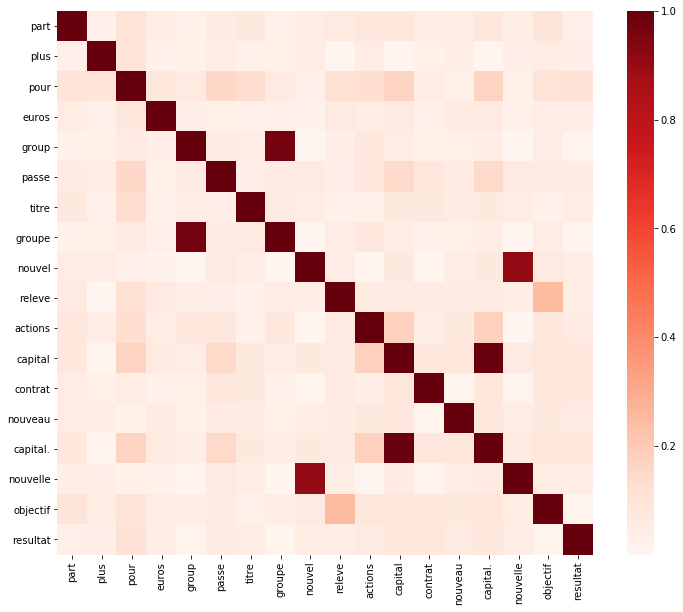

In [12]:
words = filtered_data.filter(items=df[0])
corr_w = abs(words.corr())

plt.figure(figsize=(12,10))
sns.heatmap(corr_w, annot=False, cmap=plt.cm.Reds)
plt.show()

In [13]:
columns = np.full((corr_w.shape[0],), True, dtype=bool)
for i in range(corr_w.shape[0]):
    for j in range(i+1, corr_w.shape[0]):
        if corr_w.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = words.columns[columns]
words = words[selected_columns]
words

,part,plus,pour,euros,group,passe,titre,nouvel,releve,actions,capital,contrat,nouveau,objectif,resultat
744,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
757,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
761,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
778,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
780,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106529,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
106532,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
106533,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
106536,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [50]:
filtered_data = filtered_data[filtered_data.columns[1:24]].join(words)
filtered_data

,annee,mois,jour,OP,UP,DO,CL,VO,RDMT_J,RDMT_S,...,passe,titre,nouvel,releve,actions,capital,contrat,nouveau,objectif,resultat
744,2010,10,11,27.370,27.655,27.165,27.585,583747,0.020663,0.065797,...,0,0,0,0,0,1,0,0,0,0
757,2010,10,28,29.220,29.455,28.950,29.130,752703,0.011500,0.053896,...,0,1,0,0,0,0,0,0,0,0
761,2010,10,6,26.950,27.955,26.950,27.670,1747197,-0.022407,0.042645,...,0,0,0,0,0,0,0,0,0,0
778,2010,11,26,33.415,33.775,33.075,33.660,871648,-0.022133,-0.012626,...,0,0,0,0,0,0,0,0,0,0
780,2010,11,3,29.745,29.980,29.580,29.830,880633,0.029165,0.040898,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106529,2017,9,20,21.075,21.190,21.010,21.020,2787945,-0.004282,-0.011180,...,0,0,0,0,1,0,0,1,0,0
106532,2017,9,25,20.710,20.875,20.685,20.755,2082640,-0.001445,0.037581,...,0,0,0,0,0,0,0,0,0,0
106533,2017,9,26,20.765,20.865,20.695,20.725,1622952,0.002895,0.032569,...,1,0,0,0,0,1,0,0,0,0
106536,2017,9,29,21.060,21.420,20.890,21.420,6358735,0.005369,-0.012138,...,0,0,0,1,0,0,0,0,0,0


In [51]:
filtered_data['annee']= pd.to_datetime(filtered_data.annee*10000+filtered_data.mois*100+filtered_data.jour,format='%Y%m%d')
filtered_data.rename(columns={'annee': 'date'}, inplace=True)
filtered_data.drop(columns=['mois', 'jour'], axis='columns', inplace=True)

In [52]:
filtered_data

,date,OP,UP,DO,CL,VO,RDMT_J,RDMT_S,RDMT_M,HISTO_J,...,passe,titre,nouvel,releve,actions,capital,contrat,nouveau,objectif,resultat
744,2010-10-11,27.370,27.655,27.165,27.585,583747,0.020663,0.065797,0.123255,0.009700,...,0,0,0,0,0,1,0,0,0,0
757,2010-10-28,29.220,29.455,28.950,29.130,752703,0.011500,0.053896,0.117920,-0.003251,...,0,1,0,0,0,0,0,0,0,0
761,2010-10-06,26.950,27.955,26.950,27.670,1747197,-0.022407,0.042645,0.132093,0.030540,...,0,0,0,0,0,0,0,0,0,0
778,2010-11-26,33.415,33.775,33.075,33.660,871648,-0.022133,-0.012626,0.001485,0.001339,...,0,0,0,0,0,0,0,0,0,0
780,2010-11-03,29.745,29.980,29.580,29.830,880633,0.029165,0.040898,0.126383,0.004715,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106529,2017-09-20,21.075,21.190,21.010,21.020,2787945,-0.004282,-0.011180,-0.025690,-0.007085,...,0,0,0,0,1,0,0,1,0,0
106532,2017-09-25,20.710,20.875,20.685,20.755,2082640,-0.001445,0.037581,-0.002891,0.000482,...,0,0,0,0,0,0,0,0,0,0
106533,2017-09-26,20.765,20.865,20.695,20.725,1622952,0.002895,0.032569,-0.008203,-0.001445,...,1,0,0,0,0,1,0,0,0,0
106536,2017-09-29,21.060,21.420,20.890,21.420,6358735,0.005369,-0.012138,0.014006,0.029066,...,0,0,0,1,0,0,0,0,0,0


5. Choisir un des algorithmes suivants : 
    - xgboost
    - GradientBoostingClassifier
    - neural_network.MLPClassifier
    
On laissera volontairement la présence de l'ensemble des tickers.

In [41]:
import sklearn
from sklearn.neural_network import MLPClassifier

In [58]:
# Creating training and validation sets
from sklearn.model_selection import train_test_split

#Splitting the dataset into  training and validation sets
training_set, testing_set = train_test_split(filtered_data, test_size = 0.2, random_state = 21)

In [59]:
x_train = training_set[words.columns]
y_train = training_set['RDMT_M'] > 0

In [60]:
x_test = testing_set[words.columns]
y_test = testing_set['RDMT_M'] > 0

6. Analyser les hyperparamètres et assurer un grid computing d'environ 100 n-uplets de paramètres. Une cross-validation de 4 folds est souhaitée.

In [61]:
# Choose Classifier
mlp = MLPClassifier(max_iter=100)

# Define a hyper-parameter space to search
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Run the search (X-Validation (cv)= 4)
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=4)
clf.fit(x_train, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
# Use the clf to make new predictions
y_true, y_pred = y_test , clf.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.560 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.545 (+/-0.026) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.559 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.541 (+/-0.038) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.560 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.553 (+/-0.014) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 

7. Définir la variable à expliquer comme une variable binaire sur les niveaux de rendements de la base filtrée et ce tout ticker confondu. Utiliser le package plotly pour dessiner un graphe de votre choix avec la variable à expliquer en ordonnée.

In [66]:
import plotly.express as px
filtered_data['indic']=filtered_data['RDMT_M']>0
fig = px.bar(filtered_data, x='date', y='RDMT_M', color='indic')
fig.show()

8. Obtenir le meilleur modèle suivant 2 des 3 métriques suivantes : auc, précision, recall ainsi que le top 4 de l'importance des variables.

Average precision-recall score: 1.00


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

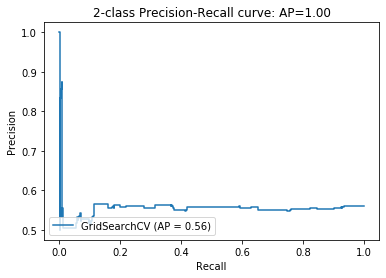

In [70]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_true)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(clf, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [71]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=2)
metrics.auc(fpr, tpr)

/Users/mcciupek/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



nan